# 2.1.	Collect initial data

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722I4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/10 08:30:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
dataf_o = spark.read.csv('energy.csv',inferSchema=True, header=True)
dataf_t = spark.read.csv('merge-target-data.csv',inferSchema=True, header=True)

# 2.2.	Describe the data

In [3]:
dataf_o.show()

+-----+-----------+--------------------+----+------------------+-----------------+-----------+-----------+---------------------------+-----------------------+------------+
|Index|    Country|         Energy_type|Year|Energy_consumption|Energy_production|        GDP| Population|Energy_intensity_per_capita|Energy_intensity_by_GDP|CO2_emission|
+-----+-----------+--------------------+----+------------------+-----------------+-----------+-----------+---------------------------+-----------------------+------------+
|    0|      World|    all_energy_types|1980|       292.8997896|      296.3372276|27770.91028|4298126.522|                68.14592081|            10.54699996|  4946.62713|
|    1|      World|                coal|1980|       78.65613403|      80.11419429|27770.91028|4298126.522|                68.14592081|            10.54699996| 1409.790188|
|    2|      World|         natural_gas|1980|        53.8652233|      54.76104559|27770.91028|4298126.522|                68.14592081|      

In [4]:
print(dataf_o.count())
print(len(dataf_o.columns))

55440
11


In [5]:
dataf_o.columns

['Index',
 'Country',
 'Energy_type',
 'Year',
 'Energy_consumption',
 'Energy_production',
 'GDP',
 'Population',
 'Energy_intensity_per_capita',
 'Energy_intensity_by_GDP',
 'CO2_emission']

In [6]:
dataf_o.printSchema()

root
 |-- Index: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Energy_type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Energy_consumption: double (nullable = true)
 |-- Energy_production: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Energy_intensity_per_capita: double (nullable = true)
 |-- Energy_intensity_by_GDP: double (nullable = true)
 |-- CO2_emission: double (nullable = true)



In [7]:
dataf_o.describe('Year','Energy_consumption','Energy_production','GDP','Population').show(6)

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|              Year|Energy_consumption| Energy_production|               GDP|        Population|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|             55440|             44287|             44289|             40026|             46014|
|   mean|            1999.5|1.5378107960862497|1.5327000118274954| 827.1441263536285|62630.204774356505|
| stddev|11.543500489144055|15.456596459863185|15.303556130414979|5981.7031440169685| 456208.8203459609|
|    min|              1980|      -0.163437731|          -1.0E-39|          0.124958|            11.471|
|    max|              2019|         601.04049|       611.5089686|       127690.2471|       7714631.064|
+-------+------------------+------------------+------------------+------------------+------------------+



In [8]:
dataf_o.describe('Energy_intensity_per_capita','Energy_intensity_by_GDP','CO2_emission').show(6)

+-------+---------------------------+-----------------------+-----------------+
|summary|Energy_intensity_per_capita|Energy_intensity_by_GDP|     CO2_emission|
+-------+---------------------------+-----------------------+-----------------+
|  count|                      50358|                  50358|            51614|
|   mean|          71.89891370173505|      3.695103862962416|78.80008185216118|
| stddev|          113.7287384219212|      4.590734599571307|902.2214628882875|
|    min|                        0.0|                    0.0|     -0.005130222|
|    max|                1139.320598|            166.9136046|       35584.9335|
+-------+---------------------------+-----------------------+-----------------+



In [9]:
dataf_pd = dataf_o.toPandas()

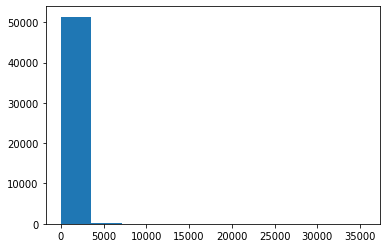

In [10]:
import matplotlib.pyplot as plt
plt.hist(dataf_pd["CO2_emission"])
plt.show()

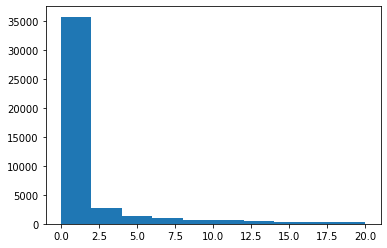

In [11]:
plt.hist(dataf_pd["CO2_emission"],range=(0,20))
plt.show()

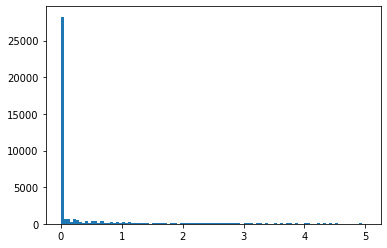

In [12]:
plt.hist(dataf_pd["CO2_emission"],range=(0,5),bins=(100))
plt.show()

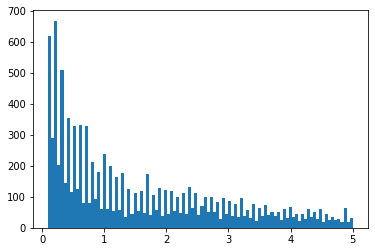

In [13]:
plt.hist(dataf_pd["CO2_emission"],range=(0.1,5),bins=(100))
plt.show()

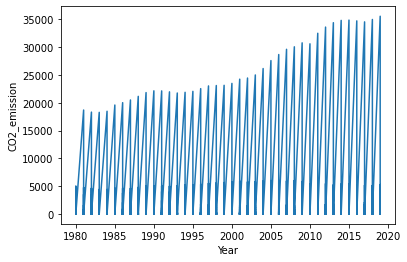

In [14]:
plt.plot(dataf_pd['Year'], dataf_pd['CO2_emission'])
plt.xlabel('Year', fontsize=10)
plt.ylabel('CO2_emission', fontsize=10)
plt.show()

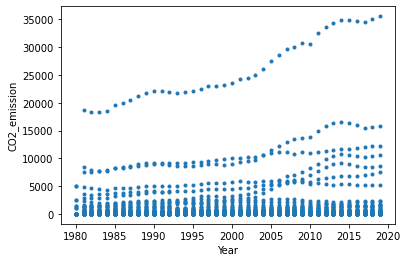

In [15]:
plt.scatter(dataf_pd['Year'], dataf_pd['CO2_emission'],marker=("."))
plt.xlabel('Year', fontsize=10)
plt.ylabel('CO2_emission', fontsize=10)
plt.show()

In [16]:
dataf_dropstr = dataf_o.drop('Country','Energy_type')
importance_o = []
for i in dataf_dropstr.columns:
    print(i,'\t',dataf_dropstr.corr("CO2_emission",i))
    importance_o.append(dataf_dropstr.corr("CO2_emission",i))

Index 	 0.018632643612994725
Year 	 0.020295664431907296
Energy_consumption 	 0.9822620890629016
Energy_production 	 0.9748444898530954
GDP 	 0.6727813752193273
Population 	 0.6659465822195475
Energy_intensity_per_capita 	 0.03834665054022199
Energy_intensity_by_GDP 	 0.0604914033135142
CO2_emission 	 1.0


In [17]:
importance_o

[0.018632643612994725,
 0.020295664431907296,
 0.9822620890629016,
 0.9748444898530954,
 0.6727813752193273,
 0.6659465822195475,
 0.03834665054022199,
 0.0604914033135142,
 1.0]

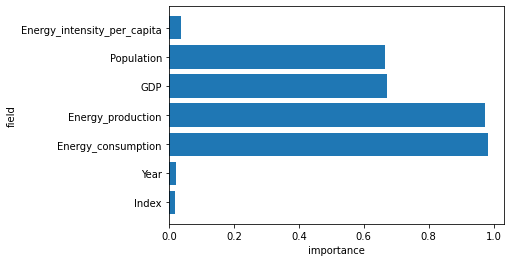

In [18]:
features_o = list(dataf_dropstr.columns)[0:7]
plt.barh(features_o, importance_o[0:7])
plt.ylabel('field', fontsize=10)
plt.xlabel('importance', fontsize=10)
plt.show()

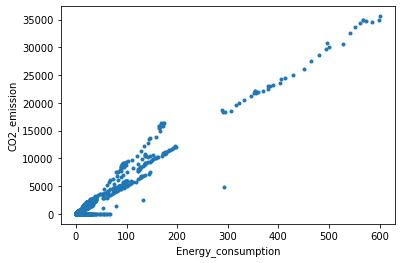

In [19]:
plt.scatter(dataf_pd['Energy_consumption'], dataf_pd['CO2_emission'],marker=("."))
plt.xlabel('Energy_consumption', fontsize=10)
plt.ylabel('CO2_emission', fontsize=10)
plt.show()

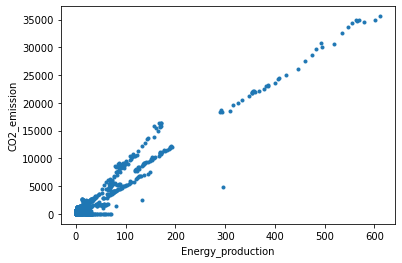

In [20]:
plt.scatter(dataf_pd['Energy_production'], dataf_pd['CO2_emission'],marker=("."))
plt.xlabel('Energy_production', fontsize=10)
plt.ylabel('CO2_emission', fontsize=10)
plt.show()

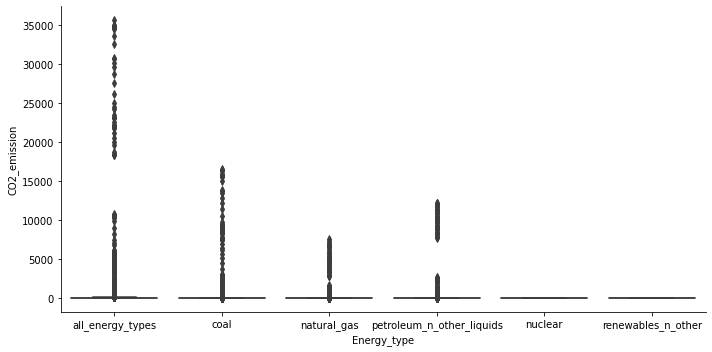

In [21]:
import seaborn as sns
sns.catplot(x="Energy_type",y="CO2_emission", data=dataf_pd,kind="box",aspect=2)
plt.show()

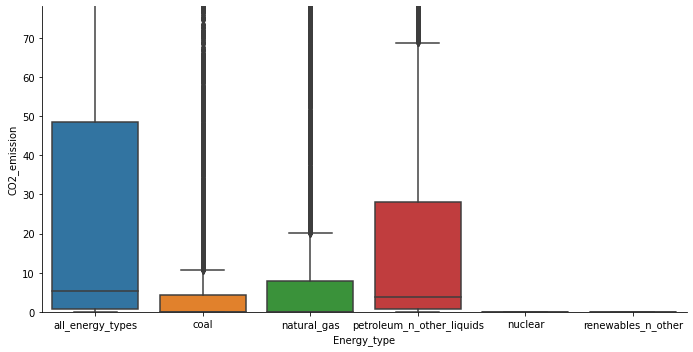

In [22]:
sns.catplot(x="Energy_type",y="CO2_emission", data=dataf_pd,kind="box",aspect=2)
plt.ylim(0, 78)
plt.show()

In [23]:
#sns.pairplot(dataf_pd)
#plt.show()

### Data quality verification 

In [24]:
import pandas as pd

In [25]:
dataf_pd.isnull().any()

Index                          False
Country                        False
Energy_type                    False
Year                           False
Energy_consumption              True
Energy_production               True
GDP                             True
Population                      True
Energy_intensity_per_capita     True
Energy_intensity_by_GDP         True
CO2_emission                    True
dtype: bool

In [26]:
dataf_pd.isnull().apply(pd.value_counts)

,Index,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
False,55440.0,55440.0,55440.0,55440.0,44287,44289,40026,46014,50358,50358,51614
True,NaN,NaN,NaN,NaN,11153,11151,15414,9426,5082,5082,3826


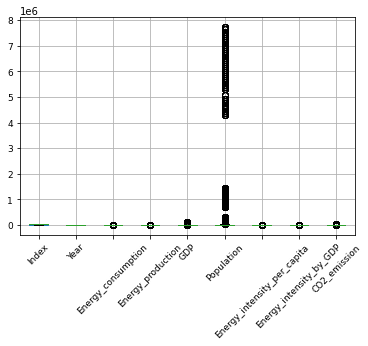

In [27]:
plt.figure()
pl=dataf_pd.boxplot(rot=45, fontsize=9,return_type = 'dict')
x = pl['fliers'][0].get_xdata()
y = pl['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.05 - 0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.8,y[i]))
plt.show()

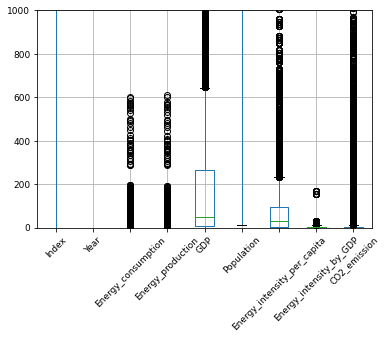

In [28]:
plt.figure()
pl=dataf_pd.boxplot(rot=45, fontsize=9,return_type = 'dict')
x = pl['fliers'][0].get_xdata()
y = pl['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.05 - 0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.8,y[i]))
plt.ylim(-1,1000)
plt.show()

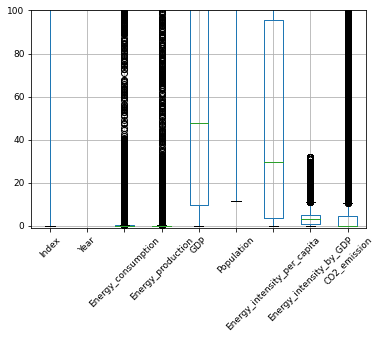

In [29]:
plt.figure()
pl=dataf_pd.boxplot(rot=45, fontsize=9,return_type = 'dict')
x = pl['fliers'][0].get_xdata()
y = pl['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.05 - 0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.8,y[i]))
plt.ylim(-1,100)
plt.show()

# Data Preparation

In [30]:
# Integrate Data Source

In [31]:
print(dataf_t.columns)
print(len(dataf_t.columns))
print(dataf_t.count())

['iso_code', 'country', 'year', 'co2', 'consumption_co2', 'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita', 'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share', 'share_global_cement_co2', 'share_global_coal_co2', 'share_global_flaring_co2', 'share_global_gas_co2', 'share_global_oil_co2', 'share_global_other_co2', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_gas_co2', 'share_global_cumula

In [32]:
dataf_t = dataf_t.withColumnRenamed('country', 'Country1')
dataf_t = dataf_t.withColumnRenamed('year', 'Year1')
dataf_t = dataf_t.withColumnRenamed('methane', 'Methane')
dataf_t = dataf_t.withColumnRenamed('nitrous_oxide', 'Nitrous_Oxide')
dataf_t = dataf_t.select('Country1', 'Year1', 'Methane', 'Nitrous_Oxide')
dataf_t.tail(10)

[Row(Country1='Zimbabwe', Year1=2011, Methane=12.26, Nitrous_Oxide=7.26),
 Row(Country1='Zimbabwe', Year1=2012, Methane=12.17, Nitrous_Oxide=6.92),
 Row(Country1='Zimbabwe', Year1=2013, Methane=12.08, Nitrous_Oxide=6.67),
 Row(Country1='Zimbabwe', Year1=2014, Methane=11.24, Nitrous_Oxide=6.27),
 Row(Country1='Zimbabwe', Year1=2015, Methane=11.87, Nitrous_Oxide=6.68),
 Row(Country1='Zimbabwe', Year1=2016, Methane=11.92, Nitrous_Oxide=6.55),
 Row(Country1='Zimbabwe', Year1=2017, Methane=None, Nitrous_Oxide=None),
 Row(Country1='Zimbabwe', Year1=2018, Methane=None, Nitrous_Oxide=None),
 Row(Country1='Zimbabwe', Year1=2019, Methane=None, Nitrous_Oxide=None),
 Row(Country1='Zimbabwe', Year1=2020, Methane=None, Nitrous_Oxide=None)]

In [33]:
dataf_o = dataf_o.join(dataf_t,(dataf_o.Year==dataf_t.Year1) & (dataf_o.Country==dataf_t.Country1),how='left')

In [34]:
print(dataf_o.columns)
print(len(dataf_o.columns))
print(dataf_o.count())

['Index', 'Country', 'Energy_type', 'Year', 'Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Country1', 'Year1', 'Methane', 'Nitrous_Oxide']
15
55440


In [35]:
dataf_1 = dataf_o.drop('Index', 'Country1','Year1')
print(len(dataf_1.columns))

12


In [36]:
# Dealing with missing values and outliers

In [37]:
dataf_1 = dataf_1.toPandas()

In [38]:
dataf_1.fillna(dataf_1.median(),inplace = True)

/tmp/ipykernel_2469/1340080914.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataf_1.fillna(dataf_1.median(),inplace = True)


In [39]:
dataf_1.isnull().apply(pd.value_counts)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Methane,Nitrous_Oxide
False,55440,55440,55440,55440,55440,55440,55440,55440,55440,55440,55440,55440


In [40]:
Q1 = dataf_1.quantile(0.25)
Q3 = dataf_1.quantile(0.75)
IQR = Q3-Q1
data_cleaned = dataf_1[~((dataf_1 < (Q1-1.5*IQR))| (dataf_1 > (Q3 + 1.5*IQR))).any(axis=1)]

/tmp/ipykernel_2469/1272082611.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cleaned = dataf_1[~((dataf_1 < (Q1-1.5*IQR))| (dataf_1 > (Q3 + 1.5*IQR))).any(axis=1)]


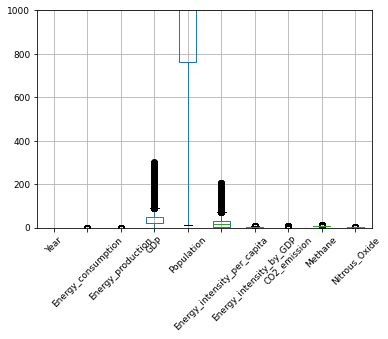

In [41]:
plt.figure()
pl=data_cleaned.boxplot(rot=45, fontsize=9,return_type = 'dict')
x = pl['fliers'][0].get_xdata()
y = pl['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.05 - 0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.8,y[i]))
plt.ylim(-1,1000)
plt.show()

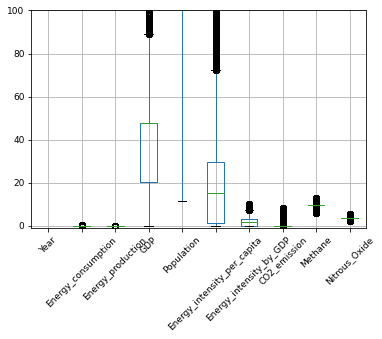

In [42]:
plt.figure()
pl=data_cleaned.boxplot(rot=45, fontsize=9,return_type = 'dict')
x = pl['fliers'][0].get_xdata()
y = pl['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.05 - 0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext = (x[i] + 0.8,y[i]))
plt.ylim(-1,100)
plt.show()

In [43]:
data_cleaned.count()

Country                        21179
Energy_type                    21179
Year                           21179
Energy_consumption             21179
Energy_production              21179
GDP                            21179
Population                     21179
Energy_intensity_per_capita    21179
Energy_intensity_by_GDP        21179
CO2_emission                   21179
Methane                        21179
Nitrous_Oxide                  21179
dtype: int64

In [44]:
import numpy as np
data_cleaned['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int32)

In [45]:
conditions = [
    (data_cleaned['Year']>0) & (data_cleaned['Year']<1990),
    (data_cleaned['Year']>=1990) & (data_cleaned['Year']<2000),
    (data_cleaned['Year']>=2000) & (data_cleaned['Year']<2010),
    (data_cleaned['Year']>=2010) & (data_cleaned['Year']<2020)
    ]
values = ['1980s','1990s','2000s','2010s']
data_cleaned['Decades'] = np.select(conditions,values)

/tmp/ipykernel_2469/1295029473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Decades'] = np.select(conditions,values)


In [46]:
data_cleaned['Decades']

6        1980s
7        1980s
8        1980s
9        1980s
10       1980s
         ...  
55435    2010s
55436    2010s
55437    2010s
55438    2010s
55439    2010s
Name: Decades, Length: 21179, dtype: object

In [47]:
conditions_Etype = [
    (data_cleaned['Energy_type']=='nuclear'),
    (data_cleaned['Energy_type']=='renewables_n_other'),
    (data_cleaned['Energy_type']=='petroleum_n_other_liquids'),
    (data_cleaned['Energy_type']=='natural_gas'),
    (data_cleaned['Energy_type']=='coal'),
    (data_cleaned['Energy_type']=='all_energy_types')
    ]
values_Etype = [1,2,3,4,5,6]
data_cleaned['Energy_type_code'] = np.select(conditions_Etype,values_Etype)

/tmp/ipykernel_2469/4092131060.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Energy_type_code'] = np.select(conditions_Etype,values_Etype)


In [48]:
conditions_decade = [
    (data_cleaned['Decades']=='1980s'),
    (data_cleaned['Decades']=='1990s'),
    (data_cleaned['Decades']=='2000s'),
    (data_cleaned['Decades']=='2010s')
    ]
values_decade = [1,2,3,4]
data_cleaned['Decades_code'] = np.select(conditions_decade,values_decade)

/tmp/ipykernel_2469/3726696100.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Decades_code'] = np.select(conditions_decade,values_decade)


In [49]:
data_cleaned['Energy_type_code']

6        6
7        5
8        4
9        3
10       1
        ..
55435    5
55436    4
55437    3
55438    1
55439    2
Name: Energy_type_code, Length: 21179, dtype: int64

In [50]:
data_cleaned['Decades_code']

6        1
7        1
8        1
9        1
10       1
        ..
55435    4
55436    4
55437    4
55438    4
55439    4
Name: Decades_code, Length: 21179, dtype: int64

In [51]:
print(len(data_cleaned.columns))

15


In [52]:
data_cleaned.columns

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission', 'Methane', 'Nitrous_Oxide',
       'Decades', 'Energy_type_code', 'Decades_code'],
      dtype='object')

In [53]:
# Data transormation

In [54]:
data_cleaned = spark.createDataFrame(data_cleaned)

In [55]:
data_cleaned = data_cleaned.drop('Country','Energy_type','Decades')

In [56]:
data_cleaned.printSchema()
print('Columns number: ',len(data_cleaned.columns))

root
 |-- Year: long (nullable = true)
 |-- Energy_consumption: double (nullable = true)
 |-- Energy_production: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Energy_intensity_per_capita: double (nullable = true)
 |-- Energy_intensity_by_GDP: double (nullable = true)
 |-- CO2_emission: double (nullable = true)
 |-- Methane: double (nullable = true)
 |-- Nitrous_Oxide: double (nullable = true)
 |-- Energy_type_code: long (nullable = true)
 |-- Decades_code: long (nullable = true)

Columns number:  12


In [57]:
column = []
cor = []
for i in data_cleaned.columns:
    column.append(i)
    cor.append(data_cleaned.corr("CO2_emission",i))
    #print(i,'\t',data_cleaned.corr("CO2_emission",i))

22/10/10 08:31:31 WARN TaskSetManager: Stage 43 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:32 WARN TaskSetManager: Stage 44 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:32 WARN TaskSetManager: Stage 45 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:33 WARN TaskSetManager: Stage 46 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:33 WARN TaskSetManager: Stage 47 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:33 WARN TaskSetManager: Stage 48 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:33 WARN TaskSetManager: Stage 49 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/

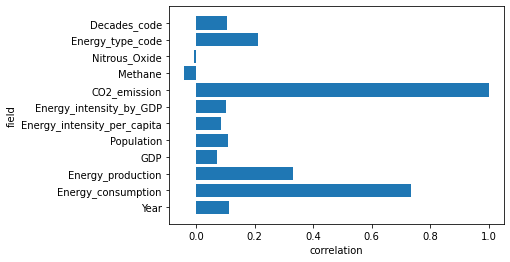

In [58]:
plt.barh(column, cor)
plt.ylabel('field', fontsize=10)
plt.xlabel('correlation', fontsize=10)
plt.show()

In [59]:
data_cleaned = data_cleaned.drop('Nitrous_Oxide','Methane','GDP','Energy_intensity_per_capita')
data_cleaned.printSchema()
print('Columns number: ',len(data_cleaned.columns))

root
 |-- Year: long (nullable = true)
 |-- Energy_consumption: double (nullable = true)
 |-- Energy_production: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Energy_intensity_by_GDP: double (nullable = true)
 |-- CO2_emission: double (nullable = true)
 |-- Energy_type_code: long (nullable = true)
 |-- Decades_code: long (nullable = true)

Columns number:  8


In [60]:
data_cleaned.createOrReplaceTempView('sql')
dataf_proj = spark.sql("(select *,log(CO2_emission) as CO2Log from sql)")

In [61]:
dataf_proj.columns

['Year',
 'Energy_consumption',
 'Energy_production',
 'Population',
 'Energy_intensity_by_GDP',
 'CO2_emission',
 'Energy_type_code',
 'Decades_code',
 'CO2Log']

In [62]:
dataf_projpd = dataf_proj.toPandas()

22/10/10 08:31:36 WARN TaskSetManager: Stage 55 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


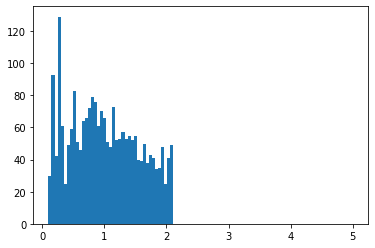

In [63]:
plt.hist(dataf_projpd["CO2Log"],range=(0.1,5),bins=(100))
plt.show()

In [64]:
dataf_proj = dataf_proj.drop('CO2_emission')
dataf_proj = dataf_proj.na.drop(subset="CO2Log")

In [65]:
dataf_proj.columns

['Year',
 'Energy_consumption',
 'Energy_production',
 'Population',
 'Energy_intensity_by_GDP',
 'Energy_type_code',
 'Decades_code',
 'CO2Log']

In [66]:
# Model Building

In [67]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
                            inputCols=['Year','Energy_consumption','Energy_production','Population','Energy_intensity_by_GDP',
                                       'Energy_type_code','Decades_code'],
                            outputCol="features")

In [68]:
dataf_Tr = assembler.transform(dataf_proj)

In [69]:
df= dataf_Tr.select("features",'CO2Log')
df.show(5)

22/10/10 08:31:37 WARN TaskSetManager: Stage 56 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+-------------------+
|            features|             CO2Log|
+--------------------+-------------------+
|[1981.0,0.0299494...| 0.2821401327329512|
|[1981.0,0.0026042...|-1.4639797980072782|
|[1981.0,0.003141,...|-2.1973186417601385|
|[1981.0,0.0166675...|-0.0165868036043989|
|[1981.0,0.0257704...| 0.8669967423860598|
+--------------------+-------------------+
only showing top 5 rows



In [70]:
train_data,test_data = df.randomSplit([0.75,0.25])
print(train_data.count())
print(test_data.count())

22/10/10 08:31:38 WARN TaskSetManager: Stage 57 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


4234


22/10/10 08:31:39 WARN TaskSetManager: Stage 60 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


1444


In [71]:
from pyspark.ml.regression import LinearRegression

linear_r = LinearRegression(labelCol='CO2Log')
linear_rModel = linear_r.fit(train_data)


22/10/10 08:31:39 WARN Instrumentation: [19b3dcdc] regParam is zero, which might cause numerical instability and overfitting.
22/10/10 08:31:40 WARN TaskSetManager: Stage 63 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:40 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/10 08:31:40 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/10/10 08:31:40 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
22/10/10 08:31:41 WARN TaskSetManager: Stage 64 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


In [72]:
print("Coefficients: {} Intercept: {}".format(linear_rModel.coefficients,linear_rModel.intercept))

Coefficients: [-0.007642599279589202,38.764107685872546,0.4315813129591016,-2.9484223974192176e-06,0.08770662581325969,-0.07303242658296415,0.06834761494555869] Intercept: 13.700802989975937


In [73]:
test_results_lr = linear_rModel.evaluate(test_data)

22/10/10 08:31:41 WARN TaskSetManager: Stage 65 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


In [74]:
test_results_lr.residuals.show()
print("RMSE: {}".format(test_results_lr.rootMeanSquaredError))

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
22/10/10 08:31:42 WARN TaskSetManager: Stage 66 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+
|          residuals|
+-------------------+
|-3.9634354192365633|
|-4.2681269808913855|
| -3.011146717554995|
|-2.2092290715357836|
|-1.7517853081150427|
|-2.2436548009338955|
|-2.0245575211850033|
|-1.3993108593723824|
|-1.0368251209758559|
|-0.6470010997453572|
|-0.7997395187670122|
| 0.8921242502673294|
|-0.9268652044477483|
|-0.3993153711529729|
|-0.5780655176276137|
|-0.7828868291928273|
|-1.8111734200766638|
|-0.5389158339591282|
|-0.3198185542102361|
|-0.8167948727195276|
+-------------------+
only showing top 20 rows

RMSE: 1.2857875436893889


In [75]:
print("R2: {}".format(test_results_lr.r2))

R2: 0.49927054000883353


In [76]:
type(test_results_lr)

pyspark.ml.regression.LinearRegressionSummary

In [77]:
predictions_lr = linear_rModel.transform(test_data)

In [78]:
predictions_lr.select("features","CO2Log","prediction").show(10)

22/10/10 08:31:42 WARN TaskSetManager: Stage 67 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+-------------------+-------------------+
|            features|             CO2Log|         prediction|
+--------------------+-------------------+-------------------+
|[1981.0,0.0,0.0,1...|-5.7437426531465965|-1.7803072339100332|
|[1981.0,4.25E-5,0...| -5.874570795636482|-1.6064438147450968|
|[1981.0,2.89344E-...|  -4.73687456290841|-1.7257278453534148|
|[1981.0,4.2285E-4...|-3.8009289579225594|-1.5916998863867757|
|[1981.0,6.29973E-...| -3.536673521224605|-1.7848882131095625|
|[1981.0,6.34872E-...| -3.809015255353917|-1.5653604544200217|
|[1981.0,6.34872E-...| -3.809015255353917|-1.7844577341689138|
|[1981.0,6.5215E-4...| -3.183991423014699|-1.7846805636423166|
|[1981.0,6.71652E-...| -2.485438263069304| -1.448613142093448|
|[1981.0,0.0011953...|-2.1909542768228603| -1.543953177077503|
+--------------------+-------------------+-------------------+
only showing top 10 rows



22/10/10 08:31:43 WARN TaskSetManager: Stage 68 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


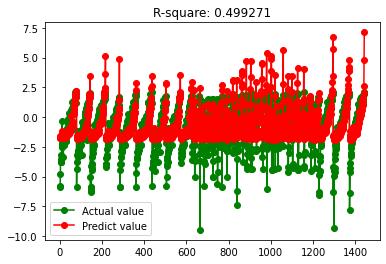

In [79]:
lr_pre = predictions_lr.toPandas()
preds = lr_pre['prediction']
test_target = lr_pre['CO2Log']
plt.figure()
plt.plot(np.arange(len(preds)), test_target,'go-',label='Actual value')
plt.plot(np.arange(len(preds)),preds,'ro-',label='Predict value')
plt.title('R-square: %f'%test_results_lr.r2)
plt.legend()
plt.show()

22/10/10 08:31:43 WARN TaskSetManager: Stage 69 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:44 WARN TaskSetManager: Stage 70 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2Log', ylabel='prediction'>

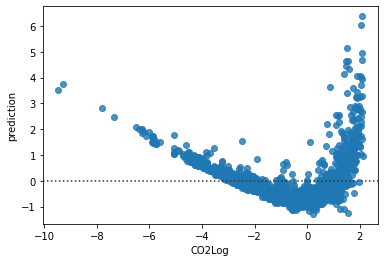

In [80]:
actual = predictions_lr.select("CO2Log").toPandas()
pred = predictions_lr.select("prediction").toPandas()

sns.residplot(actual,pred)

In [81]:
#Random Forest Model
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

In [82]:
randomf = RandomForestRegressor(labelCol='CO2Log',numTrees=10,maxDepth=10)
rf_Model = randomf.fit(train_data)

22/10/10 08:31:45 WARN TaskSetManager: Stage 71 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:45 WARN TaskSetManager: Stage 72 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:45 WARN TaskSetManager: Stage 73 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:46 WARN TaskSetManager: Stage 75 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:47 WARN TaskSetManager: Stage 77 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:47 WARN TaskSetManager: Stage 79 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:47 WARN TaskSetManager: Stage 81 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/

In [83]:
rf_Model.featureImportances

SparseVector(7, {0: 0.0195, 1: 0.7682, 2: 0.0953, 3: 0.0382, 4: 0.0493, 5: 0.0218, 6: 0.0078})

In [84]:
predictions_rf = rf_Model.transform(test_data)

In [85]:
predictions_rf.show(10)

+--------------------+-------------------+-------------------+
|            features|             CO2Log|         prediction|
+--------------------+-------------------+-------------------+
|[1981.0,0.0,0.0,1...|-5.7437426531465965| -5.079965808261607|
|[1981.0,4.25E-5,0...| -5.874570795636482| -5.042750379503026|
|[1981.0,2.89344E-...|  -4.73687456290841|-3.6346147336424046|
|[1981.0,4.2285E-4...|-3.8009289579225594|   -3.6286469670787|
|[1981.0,6.29973E-...| -3.536673521224605|-3.2993258144128754|
|[1981.0,6.34872E-...| -3.809015255353917|-3.2286336674211666|
|[1981.0,6.34872E-...| -3.809015255353917|-3.2993258144128754|
|[1981.0,6.5215E-4...| -3.183991423014699| -3.207909346511664|
|[1981.0,6.71652E-...| -2.485438263069304| -2.283730713155422|
|[1981.0,0.0011953...|-2.1909542768228603| -2.844983075393864|
+--------------------+-------------------+-------------------+
only showing top 10 rows



22/10/10 08:31:51 WARN TaskSetManager: Stage 95 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


In [86]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
labelCol="CO2Log", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_rf)
print("Root Mean Squared Error (RMSE) : %g" % rmse)

22/10/10 08:31:51 WARN TaskSetManager: Stage 96 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


Root Mean Squared Error (RMSE) : 0.498951


In [87]:
import sklearn.metrics

In [88]:
result_rf = predictions_rf.toPandas()
pred_rf = result_rf['prediction']
actual_rf = result_rf['CO2Log']
R2_rf = sklearn.metrics.r2_score(actual_rf, pred_rf)
print('R2_rf: {:4.3f}'.format(R2_rf))

22/10/10 08:31:52 WARN TaskSetManager: Stage 97 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


R2_rf: 0.925


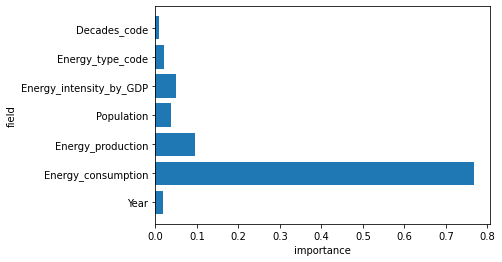

In [89]:
features = list(dataf_proj.columns)[0:7]
importance = list(rf_Model.featureImportances)
plt.barh(features, importance)
plt.ylabel('field', fontsize=10)
plt.xlabel('importance', fontsize=10)
plt.show()

22/10/10 08:31:52 WARN TaskSetManager: Stage 98 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


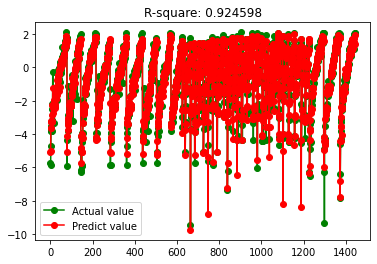

In [90]:
rf_pre = predictions_rf.toPandas()
preds_rf = rf_pre['prediction']
test_target_rf = rf_pre['CO2Log']
plt.figure()
plt.plot(np.arange(len(preds_rf)), test_target_rf,'go-',label='Actual value')
plt.plot(np.arange(len(preds_rf)),preds_rf,'ro-',label='Predict value')
plt.title('R-square: %f'%R2_rf)
plt.legend()
plt.show()

22/10/10 08:31:53 WARN TaskSetManager: Stage 99 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:53 WARN TaskSetManager: Stage 100 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2Log', ylabel='prediction'>

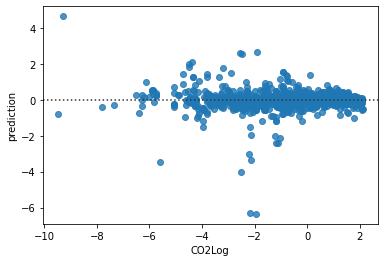

In [91]:
actual = predictions_rf.select("CO2Log").toPandas()
pred = predictions_rf.select("prediction").toPandas()

sns.residplot(actual,pred)

In [92]:
#Gradient-boosted tree regression

In [93]:
from pyspark.ml.regression import GBTRegressor
gbtr = GBTRegressor(labelCol='CO2Log')

In [94]:
gbtr_Model = gbtr.fit(train_data)

22/10/10 08:31:54 WARN TaskSetManager: Stage 101 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:54 WARN TaskSetManager: Stage 102 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:55 WARN TaskSetManager: Stage 103 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:55 WARN TaskSetManager: Stage 105 contains a task of very large size (1285 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:56 WARN TaskSetManager: Stage 107 contains a task of very large size (1285 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:56 WARN TaskSetManager: Stage 109 contains a task of very large size (1285 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:31:56 WARN TaskSetManager: Stage 111 contains a task of very large size (1285 KiB). The maximum recommended task size is 1000 KiB.

In [95]:
predictions_gbtr = gbtr_Model.transform(test_data)
predictions_gbtr.show(10)

+--------------------+-------------------+-------------------+
|            features|             CO2Log|         prediction|
+--------------------+-------------------+-------------------+
|[1981.0,0.0,0.0,1...|-5.7437426531465965| -5.059383893549711|
|[1981.0,4.25E-5,0...| -5.874570795636482| -5.558131784652964|
|[1981.0,2.89344E-...|  -4.73687456290841|-3.4137685113508485|
|[1981.0,4.2285E-4...|-3.8009289579225594|-3.3806535318664372|
|[1981.0,6.29973E-...| -3.536673521224605| -3.099445027696859|
|[1981.0,6.34872E-...| -3.809015255353917| -3.039191792813439|
|[1981.0,6.34872E-...| -3.809015255353917| -3.099445027696859|
|[1981.0,6.5215E-4...| -3.183991423014699| -3.079338485208333|
|[1981.0,6.71652E-...| -2.485438263069304|-2.5064945902697384|
|[1981.0,0.0011953...|-2.1909542768228603|-2.9507646952668676|
+--------------------+-------------------+-------------------+
only showing top 10 rows



22/10/10 08:32:08 WARN TaskSetManager: Stage 305 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


In [96]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(
labelCol="CO2Log", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_gbtr)
print("Root Mean Squared Error (RMSE): %g" % rmse)

22/10/10 08:32:08 WARN TaskSetManager: Stage 306 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


Root Mean Squared Error (RMSE): 0.59516


In [97]:
result_gbtr = predictions_gbtr.toPandas()
pred_gbtr = result_gbtr['prediction']
actual_gbtr = result_gbtr['CO2Log']
R2_gbtr = sklearn.metrics.r2_score(actual_gbtr, pred_gbtr)
print('R2_gbtr: {:4.3f}'.format(R2_gbtr))

22/10/10 08:32:08 WARN TaskSetManager: Stage 307 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


R2_gbtr: 0.893


22/10/10 08:32:09 WARN TaskSetManager: Stage 308 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


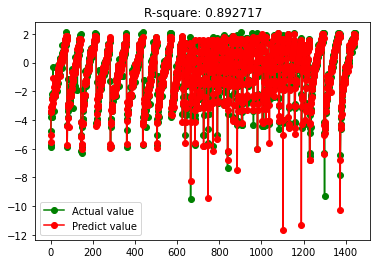

In [98]:
gbtr_pre = predictions_gbtr.toPandas()
preds_gbtr = gbtr_pre['prediction']
test_target_gbtr = gbtr_pre['CO2Log']
plt.figure()
plt.plot(np.arange(len(preds_gbtr)), test_target_gbtr,'go-',label='Actual value')
plt.plot(np.arange(len(preds_gbtr)),preds_gbtr,'ro-',label='Predict value')
plt.title('R-square: %f'%R2_gbtr)
plt.legend()
plt.show()

22/10/10 08:32:10 WARN TaskSetManager: Stage 309 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
22/10/10 08:32:10 WARN TaskSetManager: Stage 310 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2Log', ylabel='prediction'>

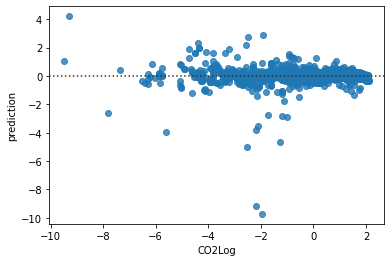

In [99]:
actual = predictions_gbtr.select("CO2Log").toPandas()
pred = predictions_gbtr.select("prediction").toPandas()

sns.residplot(actual,pred)

In [100]:
#train_data,test_data = df.randomSplit([0.75,0.25])
print(train_data.count())
print(test_data.count())

22/10/10 08:32:10 WARN TaskSetManager: Stage 311 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


4234


22/10/10 08:32:11 WARN TaskSetManager: Stage 314 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


1444


In [101]:
tr_d = train_data.toPandas()

22/10/10 08:32:11 WARN TaskSetManager: Stage 317 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


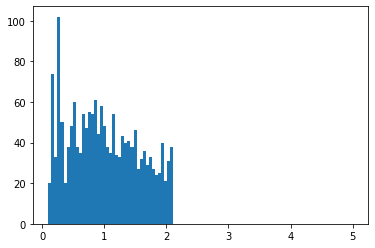

In [102]:
plt.hist(tr_d["CO2Log"],range=(0.1,5),bins=(100))
plt.show()

In [103]:
t_d = test_data.toPandas()

22/10/10 08:32:12 WARN TaskSetManager: Stage 318 contains a task of very large size (1284 KiB). The maximum recommended task size is 1000 KiB.


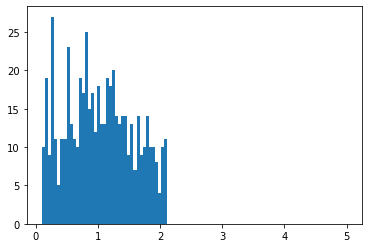

In [104]:
plt.hist(t_d["CO2Log"],range=(0.1,5),bins=(100))
plt.show()

In [105]:
comps = np.array(tr_d.features)
co2 = list(tr_d.CO2Log)
co2 = np.exp(co2)

In [106]:
comslist = []
for i in range(len(comps)):
    comslist.append(comps[i][1])

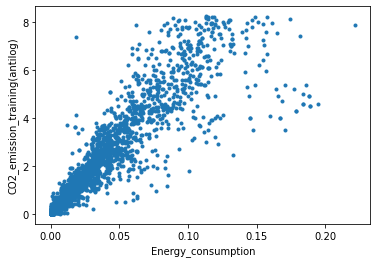

In [107]:
plt.scatter(comslist,co2,marker=("."))
plt.xlabel('Energy_consumption', fontsize=10)
plt.ylabel('CO2_emission_training(antilog)', fontsize=10)
plt.show()

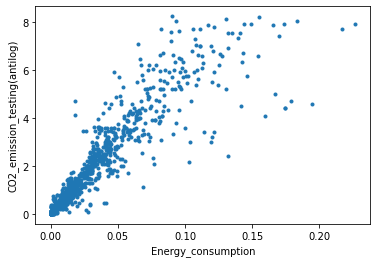

In [108]:
comps = np.array(t_d.features)
co2 = list(t_d.CO2Log)
co2 = np.exp(co2)

comslist = []
for i in range(len(comps)):
    comslist.append(comps[i][1])
    
plt.scatter(comslist,co2,marker=("."))
plt.xlabel('Energy_consumption', fontsize=10)
plt.ylabel('CO2_emission_testing(antilog)', fontsize=10)
plt.show()

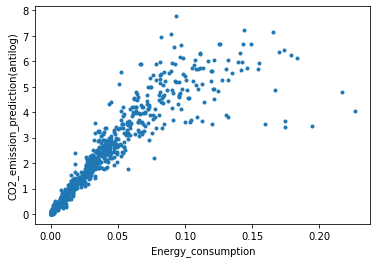

In [109]:
comps = np.array(t_d.features)
co2_rf = list(pred_rf)
co2_rf = np.exp(co2_rf)

comslist = []
for i in range(len(comps)):
    comslist.append(comps[i][1])
    
plt.scatter(comslist,co2_rf,marker=("."))
plt.xlabel('Energy_consumption', fontsize=10)
plt.ylabel('CO2_emission_prediction(antilog)', fontsize=10)
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

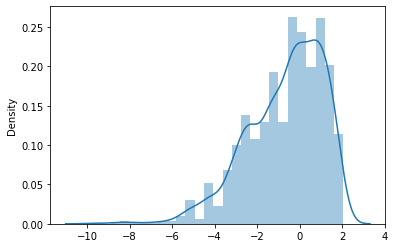

In [117]:
import seaborn as sns
sns.distplot(list(pred_rf))